In [1]:
# pylab
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate

In [2]:
from IPython.display import IFrame, display
file = 'Lectures/SeriesFourier.pdf'
IFrame(file, width=550, height=400)

# Series de Fourier

$$ f(t) \approx \frac{a_{0}}{2} + \sum_{n=1}^{\infty} [  a_{n} cos(\frac{2\pi n}{T}t) + b_{n} sin( \frac{2\pi n}{T} t)  ]  $$ 

donde $a_{0}$, $a_{n}$ y $b_{n}$ son los coeficientes de fourier 

$a_{0} = \frac{2}{T} \int_{-T/2}^{T/2} f(t)dt $,   $a_{n} = \frac{2}{T} \int_{-T/2}^{T/2} f(t)cos(\frac{2\pi n}{T}t) dt $ y   $b_{n} = \frac{2}{T} \int_{-T/2}^{T/2} f(t)sin(\frac{2\pi n}{T}t) dt $

## Hagamos un par de ejemplos usando integrate 

$$ y(t)=t,  \ -1 < t < 1  $$

$$ y(t) = \left\{ \begin{array}{cc}
1 & -1 < t < 0 \\
0 &  0 < t < 1 \\
\end{array}
\right.
$$

In [3]:
# definimos f(t)
def f(t):
   # return t
    return np.piecewise( t, [t<0, t>=0], [lambda t:1, lambda t: 0] )  

In [4]:
def GetFourier(t, T, N):
    
    y = t
    
    a0, error0 = integrate.quad(lambda t: f(t), -0.5*T, 0.5*T)
    a0 *= 2./T
    
    y = a0
    
    for n in range(1,N):
        an, erroran = integrate.quad(lambda t: f(t)*np.cos( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
        bn, errorbn = integrate.quad(lambda t: f(t)*np.sin( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
        y += an*np.cos( (2*np.pi*n*t)/T ) + bn*np.sin( (2*np.pi*n*t)/T ) 
    
    return y

In [5]:
t = np.arange(-3.,3.,0.01)
y = GetFourier(t,2,50)

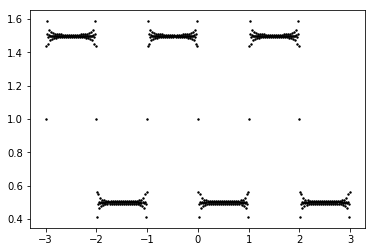

In [6]:
fig = plt.figure()
#plt.plot(t,y)
plt.scatter(t,y, c='k', s=2)

# Usemos pygame para visualizar geométricamente la serie.

In [7]:
#!pip install pygame
import pygame, time, os

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
os.environ['SDL_VIDEO_CENTERED']='1'

In [9]:
# Configurar el entorno de pygame

W, H = 1000,500
fps = 60
pygame.display.set_caption('Serie de Fourier')
screen = pygame.display.set_mode((W,H))
clock = pygame.time.Clock()

In [10]:
# Configurar Colores

white = (230, 230, 230)
black = (28, 28, 28)
gray = (100, 100, 100)
green = (54, 255, 141)
gray2 = (80, 80,100)

screen.fill(white)

<rect(0, 0, 1000, 500)>

In [14]:
N = 1
time = 0
radio = 0
Xp, Yp = 250,250
WList = []
offset = 300

In [17]:
it = 7 # Numero de iteraciones

# Para dibujar los ciclos tener en cuenta que el eje X
# Son los valores no nulos de la serie
# Los radios son los coeficientes en cada armonico

In [ ]:
# Corriendo Simulacion

run = True

while run:
    clock.tick(fps)
    screen.fill(white)
    for event in pygame.event.get():
        if(event.type == pygame.QUIT):
            run = False
    x = Xp
    y = Yp
    
    for i in range(it):
        oldx = x
        oldy = y
        
        omega = 1.
        N = i*2+1 # Tomando impares
        
        # Aca el radio es el coeficiente de fourier
        
        radio = 100*(4/(N*np.pi))
        #radio = 100*(8/(N*np.pi)**2)
        
        # La proyeccion en Y se pinta,
        # La proyeccion en X es solo para los circulos
        
        x+= int( radio * np.cos(N*omega*time))
        y+= int( radio * np.sin(N*omega*time))
        
       # x+= int( radio * np.sin(N*omega*time))
       # y+= int( radio * np.cos(N*omega*time))
        
        # Dibujando los circulos
        pygame.draw.circle(screen,gray, (oldx,oldy), int(radio), 2)
        pygame.draw.line(screen, black, (oldx, oldy), (x,y) , 3)
        pygame.draw.circle(screen, green, (x,y), 5)
        
    WList.insert(0,y)
    if len(WList) > 1000:
        WList.pop()
        
    pygame.draw.line(screen,gray, (x,y), (Xp + offset, WList[0]),3 )
    
    for index in range(len(WList)):
        pygame.draw.circle(screen, gray2, (index + Xp + offset, WList[index]),3)
    
    time += 0.01
    pygame.display.update()
    
pygame.quit()